In [1]:
import cv2
import os
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.nn import Module
import torch.nn.functional as F
from torch.nn.modules.padding import ReplicationPad2d
from glob import glob
# from tensorboardX import SummaryWriter
from torch.utils.tensorboard import SummaryWriter
import re
import mylib.polSAR_utils as psr
from mylib import types
import torchvision
import yaml
from mylib import types
from typing import Optional
import random
from torch import Tensor
from random import shuffle
from scipy import special

In [2]:
path = r'/home/csl/code/PolSAR_N2N/data/BSR/BSDS500/data/images'
imgs = glob(osp.join(path, '*/*.jpg'))
len(imgs)

500

In [3]:
for img in imgs:
    im = cv2.imread(img)
    print(im.shape[:2])

(321, 481)
(321, 481)
(481, 321)
(321, 481)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(481, 321)
(481, 321)
(321, 481)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(481, 321)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(481, 321)
(481, 321)
(321, 481)
(321, 481)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(481, 321)
(481, 321)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(481, 321)
(321, 481)
(481, 321)
(321, 481)
(481, 321)
(481, 321)
(321, 481)
(481, 321)
(321, 481)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(481, 321)
(321, 481)
(321, 481)
(481, 321)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(481, 321)
(321, 481)
(481, 321)
(321, 481)
(321, 481)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(481, 321)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(481, 321)

In [7]:
special.digamma(1)

-0.5772156649015329

In [4]:
a = [1,2]
b = [i+3 for i in a]
a, b

([1, 2], [4, 5])

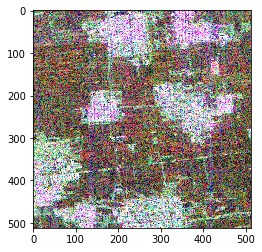

In [14]:
f = aug.RandomRotation(360)
im = cv2.imread(r'/home/csl/code/PolSAR_N2N/data/GF3/data/E115_N39_中国河北/降轨/1/20161209/C3/0/PauliRGB.bmp')
plt.imshow(im)

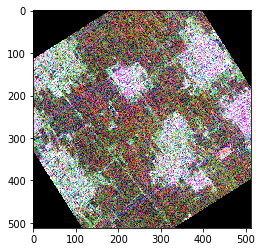

In [22]:
img = f(im.transpose(2, 0, 1))
img = img.numpy()
img = img.transpose(1, 2, 0)
plt.imshow(img)

In [ ]:
a = torch.arange(8).reshape(2, 2, 2)
# f = Boxcar_smooth(3)
f = aug.RandomHorizontalFlip(0.5)
b = f(a)
print(f'a:\n{a}\nb:\n{b}')

In [ ]:
a = list(range(10))
# a.pop([1, 3, 5])
a

In [ ]:
random.sample(range(10), 5)

In [ ]:
path = r'data/GF3/data'
# path = r'/data/csl/PolSAR_building_det/data/GF3'
all_files = []
for root, dirs, files in os.walk(path):
    if root.endswith('Hoekman'):
        for dir in dirs:
            all_files.append(osp.join(root, dir))


In [ ]:
all_files

In [ ]:
len(all_files)*0.01


In [ ]:
c = a()
c._a__b
setattr(c, '_a__b', 5)
c._a__b

In [ ]:
a = torch.tensor([1+2j, 3+4j]).view(1,1,1,1,2)
a, a.abs()

In [ ]:
np.angle(np.array([100,1, 1+1j, 10000j, -1, -1-1j, -1j, 3-3j]).reshape(1,1,1,1,1,2,-1))

In [ ]:

class ComplexUpsample(Module):
    def __init__(self, size = None, scale_factor = None,
                 mode: str = 'nearest', align_corners: Optional[bool] = None) -> None:
        super().__init__()
        self.up = nn.Upsample(size=size, scale_factor=scale_factor, mode=mode, align_corners=align_corners)
        
    def forward(self, input: Tensor) -> Tensor:
        if 'complex' not in str(input.dtype):
            raise ValueError('not support non-complex data')
        real = self.up(input.real)
        imag = self.up(input.imag)
        return real + 1j*imag

In [ ]:
a = torch.tensor([[1,2],[3,4]])+1j*torch.tensor([[8,6],[7,5]]).view(1,1,2,2)
b = ComplexUpsample(scale_factor=2, mode='bilinear')
a,b(a)

In [ ]:
str(a.dtype)